<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-03-23 22:34:56--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]   1.33M  --.-KB/s    in 0.06s   

2022-03-23 22:34:56 (20.8 MB/s) - ‘train.csv’ saved [1397869/1397869]

--2022-03-23 22:34:56--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text/pla

In [4]:
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [5]:
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
y = np.log(y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.066950
Feature 1: 0.098646
Feature 2: 0.065147
Feature 3: 0.056052
Feature 4: 0.065711
Feature 5: 0.113441
Feature 6: 0.085582
Feature 7: 0.096348
Feature 8: 0.110205
Feature 9: 0.111138
Feature 10: 0.095992
Feature 11: 0.067714
Feature 12: 0.108413
Feature 13: 0.082944
Feature 14: 0.214325
Feature 15: 0.083043
Feature 16: 0.012148
Feature 17: 0.006751
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.018852
Feature 21: 0.003658
Feature 22: 0.000000
Feature 23: 0.013147
Feature 24: 0.001307
Feature 25: 0.018417
Feature 26: 0.000000


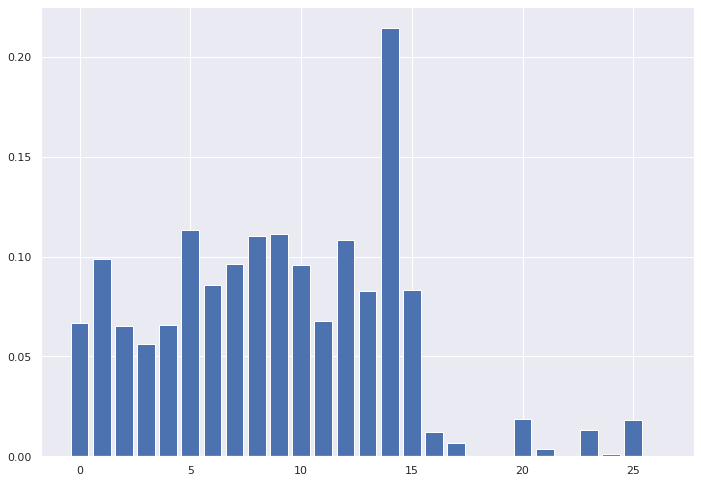

In [7]:
# feature selection
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [8]:
#np.argmax(fs.scores_)
importantes = np.argpartition(fs.scores_, -4)[-10:]
n_preditoras = [preditoras[i]  for i in importantes if preditoras[i] not in ['V8','V13','V10','V9']]
X = dfTrain[n_preditoras].values



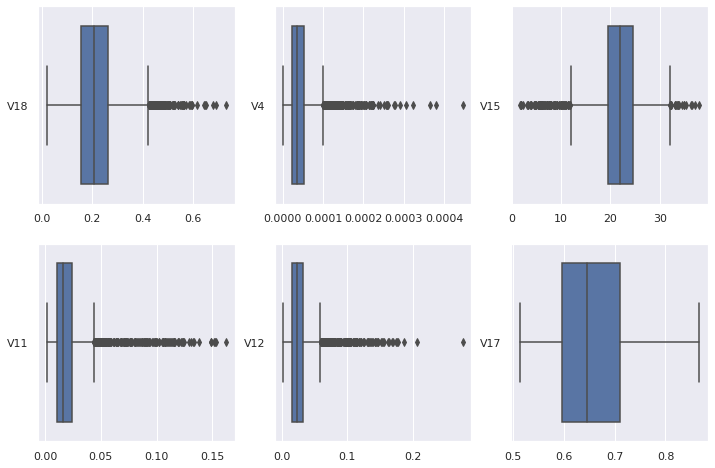

In [33]:
fig, ax =plt.subplots(2,3, figsize=(12, 8))#, sharex=True
for i, c in enumerate(n_preditoras):
  j = 0 if i<=2 else 1
  k = i if i<=2 else i-3
  data = dfTrain[[c]]
  sns.boxplot(data=data, orient='h', ax=ax[j,k])

In [ ]:
#Ajusta o modelo de regressão linear múltipla para o score

modelo = ols('score ~ ' + ' + '.join(n_preditoras) ,data=dfTrain)

res = modelo.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     68.04
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           5.06e-81
Time:                        23:49:09   Log-Likelihood:                -15517.
No. Observations:                4141   AIC:                         3.105e+04
Df Residuals:                    4134   BIC:                         3.109e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.4112      2.760     22.975      0.0

False